<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  20.6M      0  0:00:01  0:00:01 --:--:-- 20.6M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

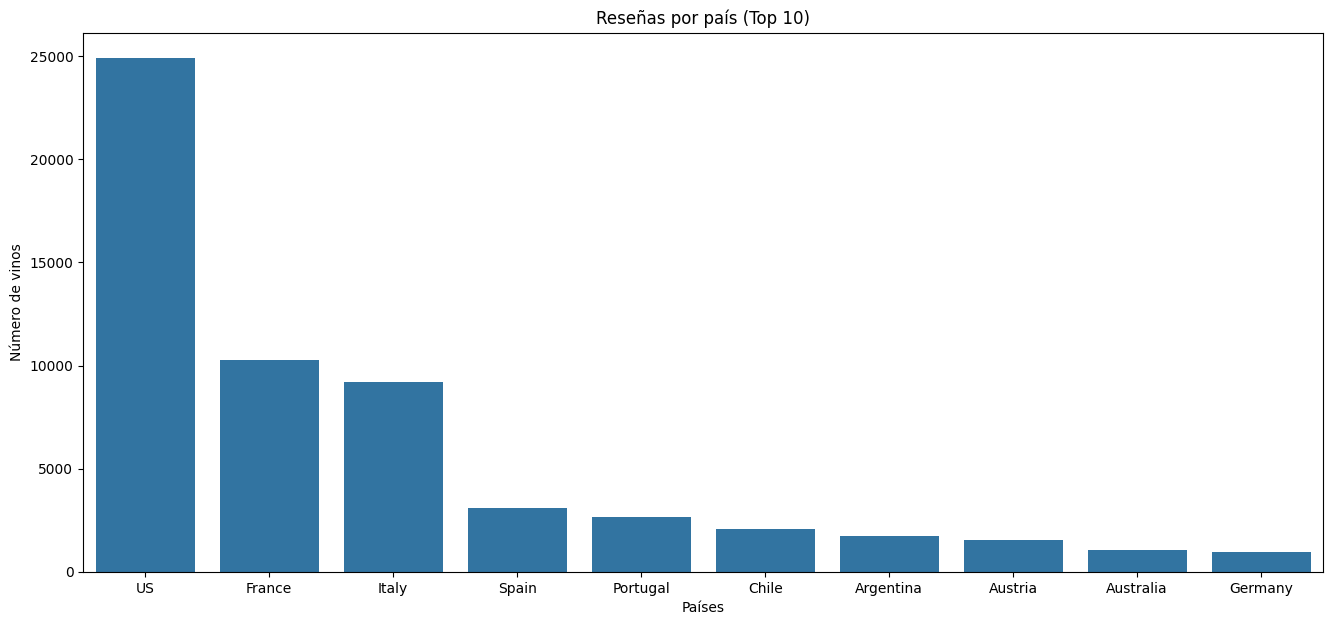

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

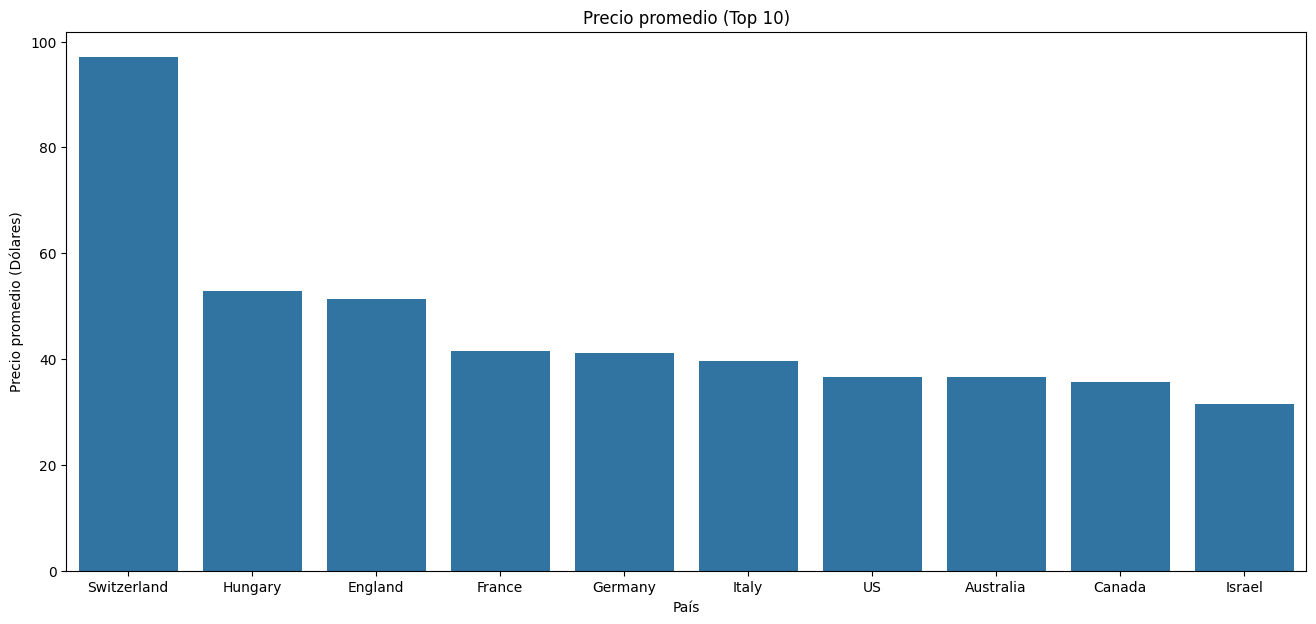

In [7]:
"""
SECUENCIA:
Utilizar el método groupby para agrupar los datos por país.
Calcular el precio promedio para cada país agrupado.
Ordenar los precios promedio de forma descendente.
Seleccionar los 10 primeros países con los precios promedio más altos.
Mostrar estos precios promedio en una gráfica de barras.

"""
precio_promedio_por_pais = df.groupby('country')['price'].mean()
top_10_paises_precio_promedio = precio_promedio_por_pais.sort_values(ascending=False).head(10)
x = top_10_paises_precio_promedio.index
y = top_10_paises_precio_promedio.values

plt.figure(figsize=(16,7))

sns.barplot(x=x, y=y)

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

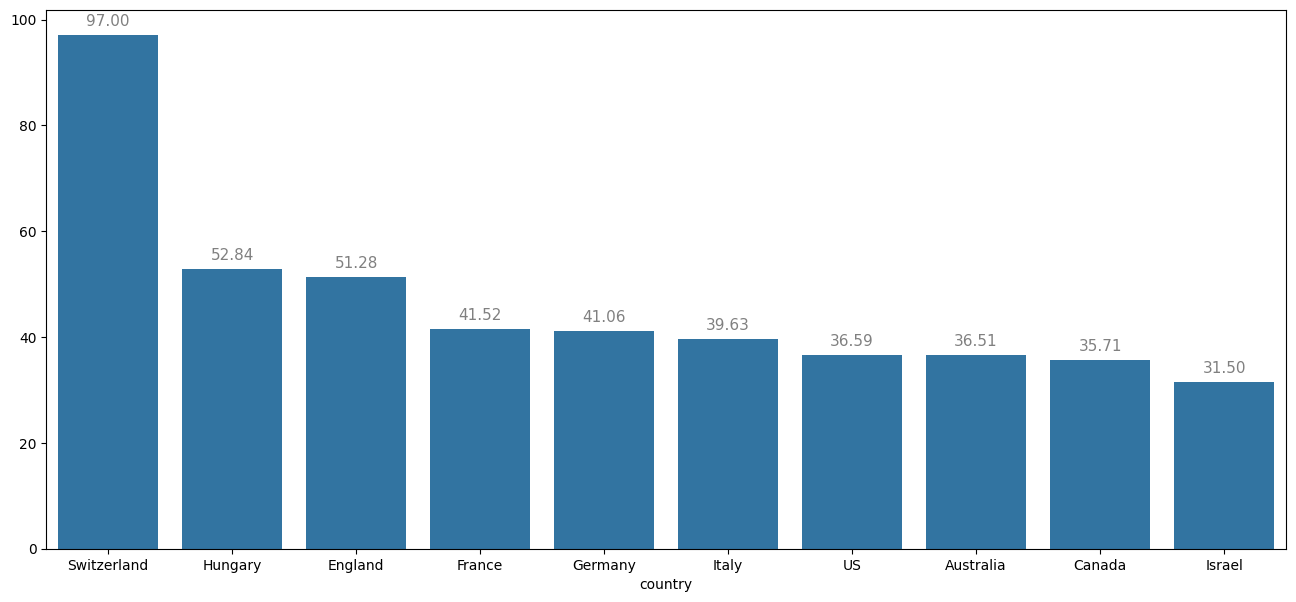

In [8]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x,y=y)#(x[:10], y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

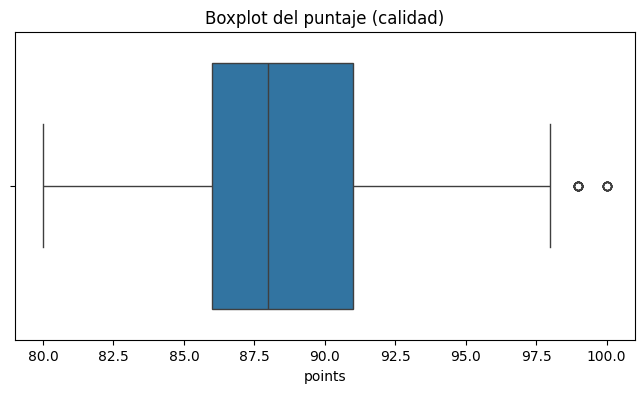

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

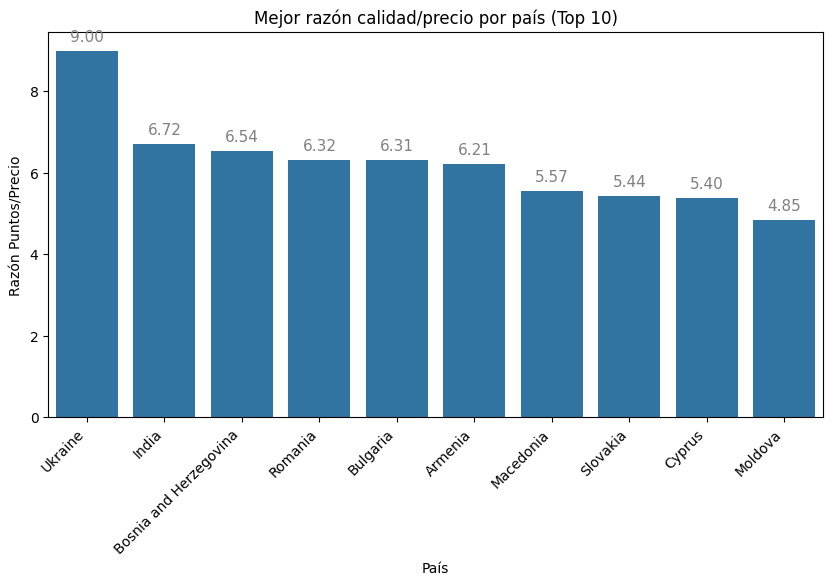

In [10]:
"""
SECUENCIA:
Utilizar el método groupby para agrupar los datos por país.
Calcular el precio promedio y el puntaje promedio para cada país agrupado.
Calcular la razón puntos/precio promedio para cada país.
Ordenar las razones de forma descendente.
Seleccionar los 10 primeros países con las mejores razones puntos/precio.
Mostrar estas razones en una gráfica de barras junto con los valores de las razones sobre cada barra.
"""
plt.figure(figsize=(10,5))



promedio_precio_puntos_por_pais = df.groupby('country').agg({'price': 'mean', 'points': 'mean'})

promedio_precio_puntos_por_pais['razon'] = promedio_precio_puntos_por_pais['points'] / promedio_precio_puntos_por_pais['price']

top_10_paises_razon = promedio_precio_puntos_por_pais['razon'].sort_values(ascending=False).head(10)

ax = sns.barplot(x=top_10_paises_razon.index, y=top_10_paises_razon.values)
#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

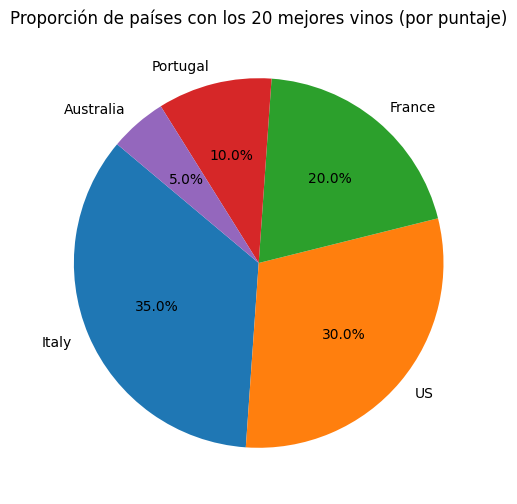

In [11]:
# 1. Ordenar el DataFrame por puntaje en orden descendente y seleccionar los primeros 20 vinos
top_20_vinos = df.nlargest(20, 'points')

# 2. Obtener los países de los vinos seleccionados
paises_top_20 = top_20_vinos['country'].value_counts()

# 3. Mostrar la proporción de los países en una gráfica de pastel
plt.figure(figsize=(10, 6))
plt.pie(paises_top_20, labels=paises_top_20.index, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de países con los 20 mejores vinos (por puntaje)")

plt.show()


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [12]:
#TU CODIGO
variedades  = df['variety'].value_counts(normalize=True).head(10)
print(variedades)


variety
Pinot Noir                  0.101608
Chardonnay                  0.089057
Cabernet Sauvignon          0.072556
Red Blend                   0.069656
Bordeaux-style Red Blend    0.052738
Riesling                    0.040103
Sauvignon Blanc             0.039070
Syrah                       0.031669
Rosé                        0.026502
Merlot                      0.023535
Name: proportion, dtype: float64


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [13]:
#TU CODIGO
top_20_bodegas_proporcion = df['winery'].value_counts(normalize=True).head(20)
print(top_20_bodegas_proporcion)


winery
Georges Duboeuf               0.001817
Wines & Winemakers            0.001783
Testarossa                    0.001617
Louis Latour                  0.001450
Chateau Ste. Michelle         0.001433
Williams Selyem               0.001433
DFJ Vinhos                    0.001433
Concha y Toro                 0.001300
Gary Farrell                  0.001233
Lynmar                        0.001200
Kendall-Jackson               0.001133
Robert Mondavi                0.001083
Columbia Crest                0.000950
Trapiche                      0.000950
Undurraga                     0.000933
Siduri                        0.000917
Albert Bichot                 0.000917
Jean-Luc and Paul Aegerter    0.000883
Casa Santos Lima              0.000883
Rodney Strong                 0.000883
Name: proportion, dtype: float64


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [14]:
#TU CODIGO

# 1. Filtrar el DataFrame original para incluir las 10 variedades de uva más importantes y las 20 bodegas más importantes
variedades_top_10 = df['variety'].value_counts().head(10).index
bodegas_top_20 = df['winery'].value_counts().head(20).index
nueva_tabla = df[df['variety'].isin(variedades_top_10) & df['winery'].isin(bodegas_top_20)]

# 2. Seleccionar las columnas país, bodega, variedad, puntuación y precio
nueva_tabla = nueva_tabla[['country', 'winery', 'variety', 'points', 'price']]

# 3. Calcular la columna adicional de puntos/precio
nueva_tabla['points/price'] = nueva_tabla['points'] / nueva_tabla['price']

# 4. Cambiar el nombre de la bodega para que incluya su país de origen
nueva_tabla['winery'] = nueva_tabla['winery'] + " (" + nueva_tabla['country'] + ")"

# 5. Ordenar los datos por nombre de país, variedad y bodega en orden ascendente
nueva_tabla = nueva_tabla.sort_values(by=['country', 'variety', 'winery'], ascending=True)

# Mostrar la nueva tabla
print(nueva_tabla)


         country                winery             variety  points  price  \
2141   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      84   10.0   
3056   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   15.0   
15948  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      90   15.0   
24370  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   10.0   
30928  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      91   30.0   
...          ...                   ...                 ...     ...    ...   
235           US       Testarossa (US)               Syrah      85   49.0   
21415         US       Testarossa (US)               Syrah      91   54.0   
37366         US       Testarossa (US)               Syrah      94   54.0   
54756         US       Testarossa (US)               Syrah      94   54.0   
26489        NaN                   NaN     Sauvignon Blanc      87   12.0   

       points/price  
2141       8.400000  
3056       5.866667  
15948    

#### &#9758; Observa la relación puntos-precio por país

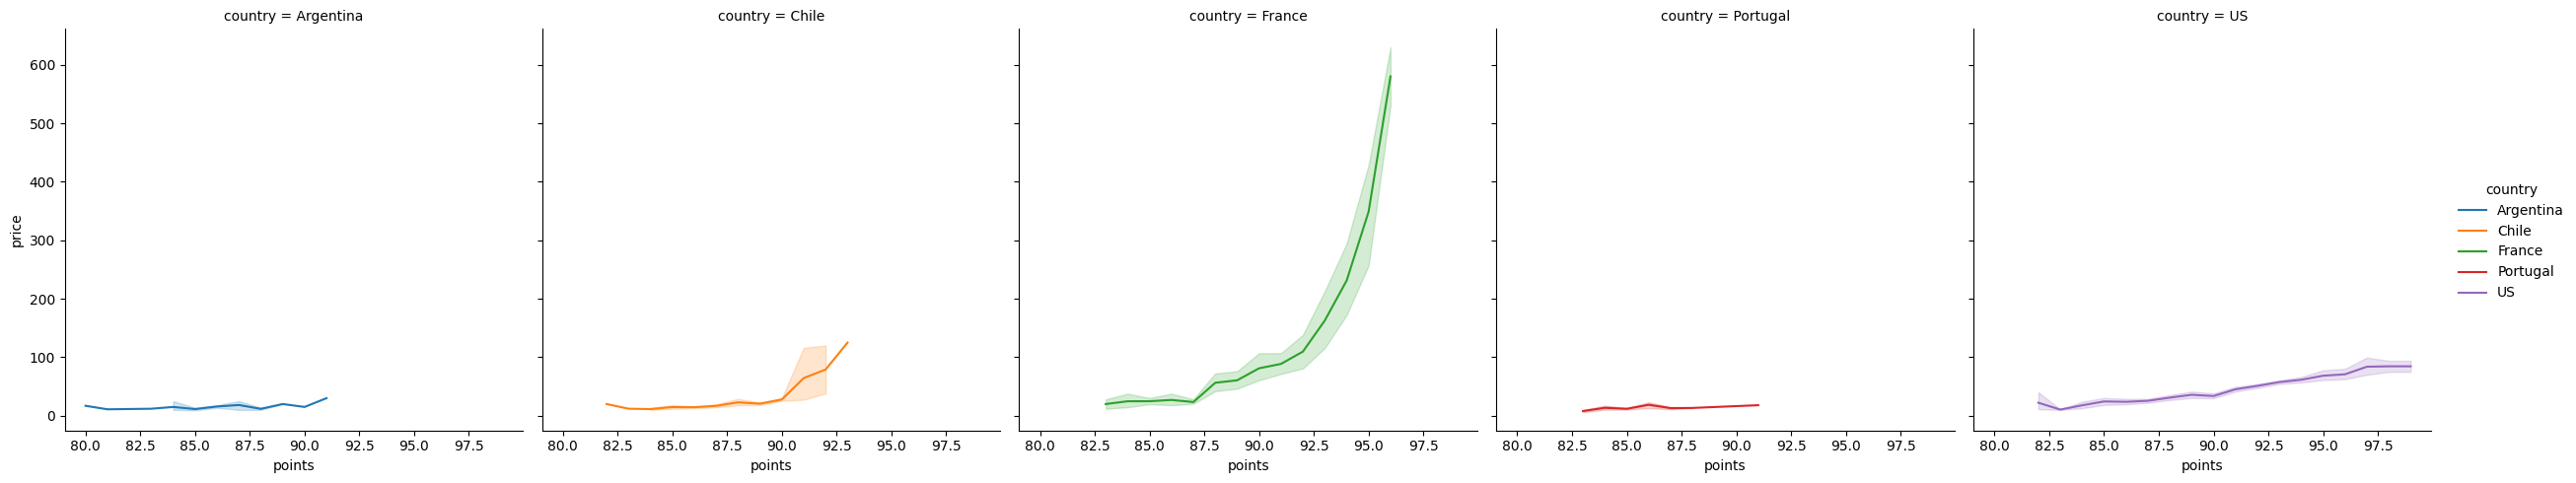

In [15]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=nueva_tabla)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

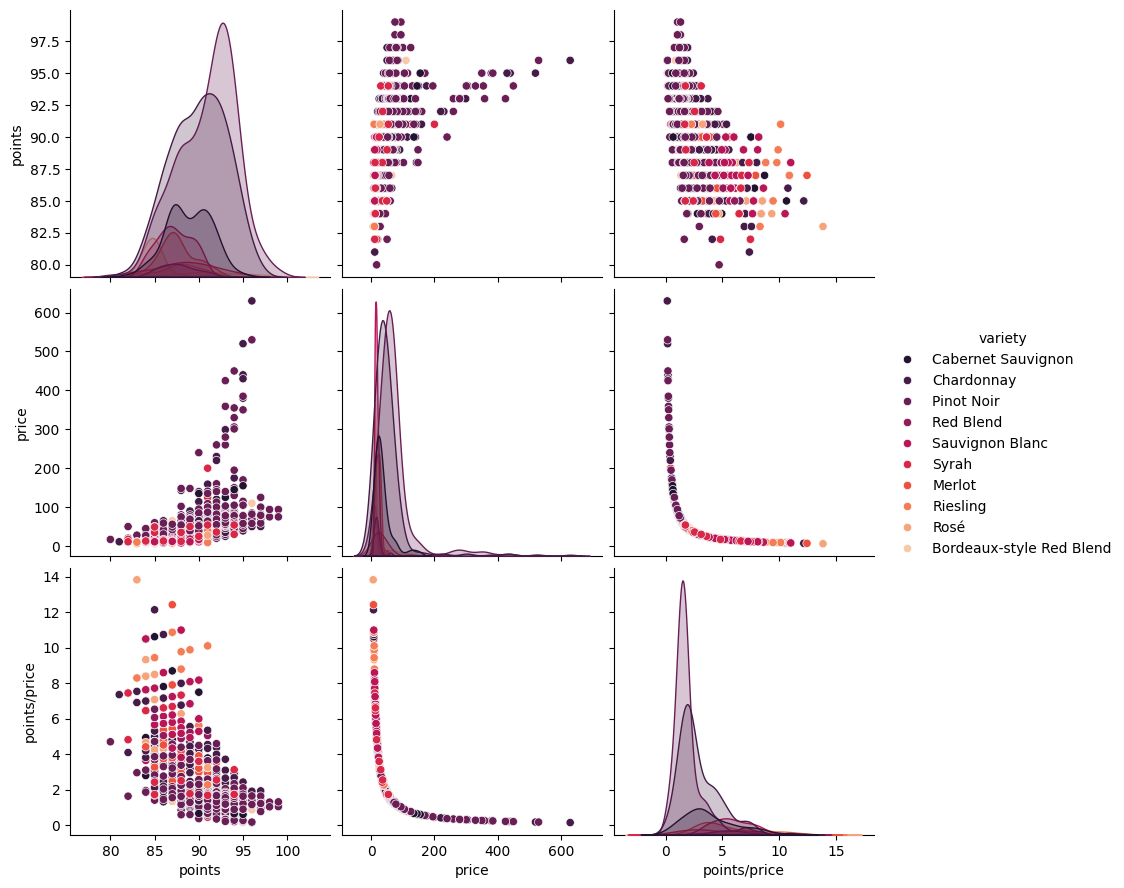

In [16]:
sns.pairplot(nueva_tabla, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

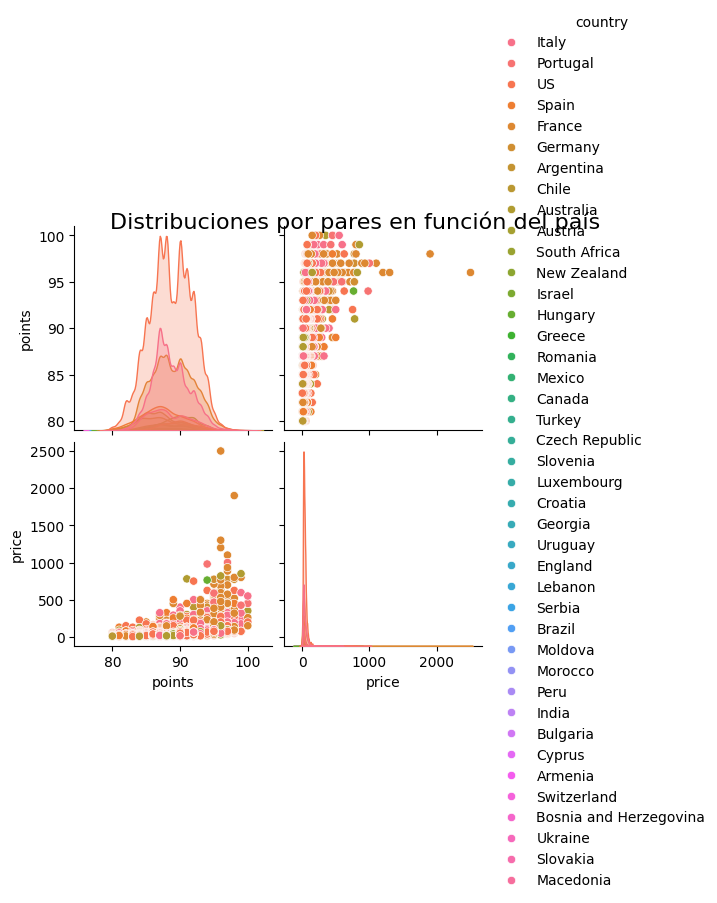

In [17]:
#TU CODIGO
import seaborn as sns

# Filtrar las variables numéricas para el pairplot
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Añadir la variable 'country' al DataFrame de variables numéricas
variables_numericas['country'] = df['country']

# Crear el pairplot
sns.pairplot(variables_numericas, hue='country', diag_kind='kde')

# Ajustar el diseño de los subplots
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribuciones por pares en función del país', fontsize=16)

# Mostrar el pairplot
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

In [18]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las variables numéricas para el pairplot
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Añadir la variable 'winery' al DataFrame de variables numéricas
variables_numericas['winery'] = df['winery']

# Crear el pairplot
sns.pairplot(variables_numericas, hue='winery', diag_kind='kde')

# Ajustar el diseño de los subplots
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribuciones por pares en función de la bodega', fontsize=16)

# Mostrar el pairplot
plt.show()


ValueError: Image size of 919x275172 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 922.625x500 with 6 Axes>

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

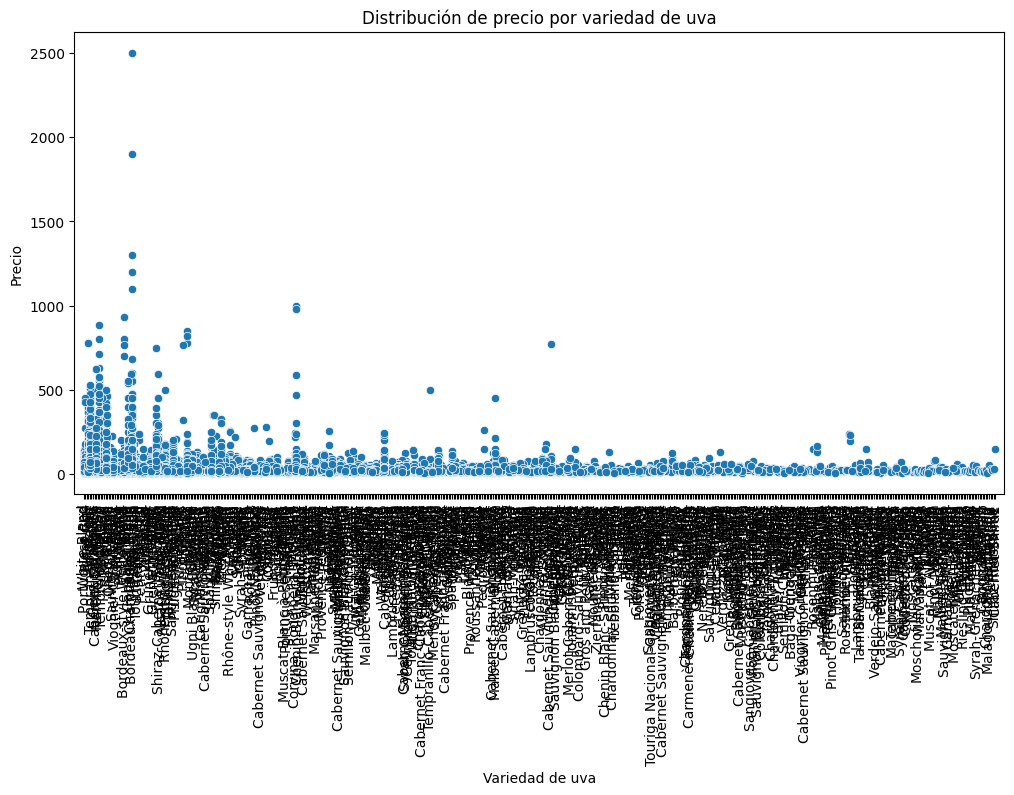

In [19]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='variety', y='price')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que se corten las etiquetas
plt.margins(x=0.01)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de precio por variedad de uva')
plt.xlabel('Variedad de uva')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

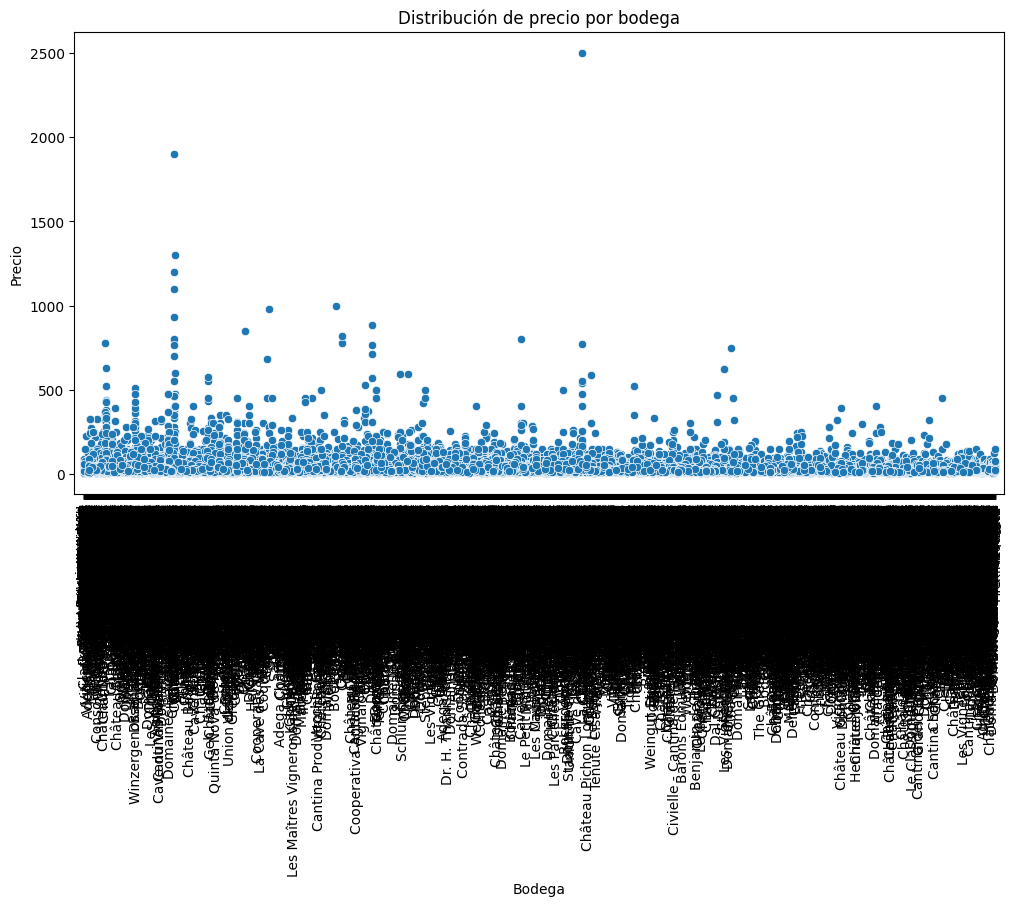

In [20]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='winery', y='price')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que se corten las etiquetas
plt.margins(x=0.01)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de precio por bodega')
plt.xlabel('Bodega')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

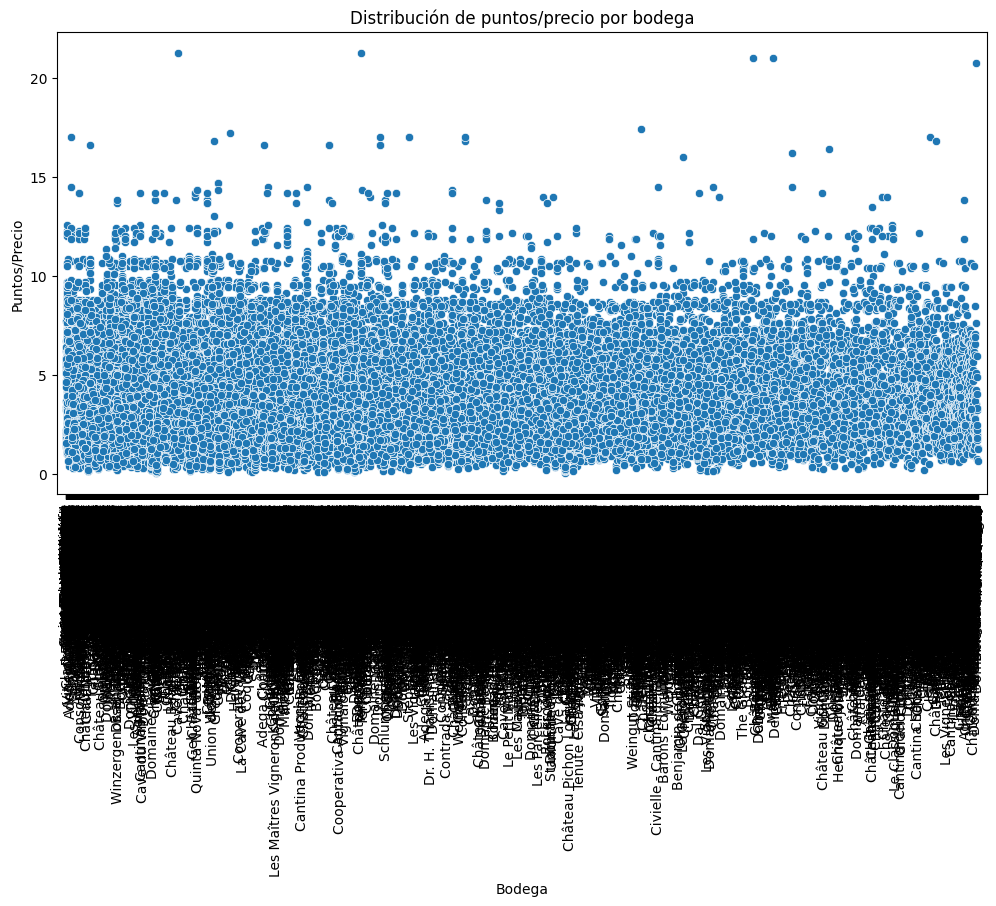

In [21]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la razón puntos/precio
df['points/price'] = df['points'] / df['price']

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='winery', y='points/price')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que se corten las etiquetas
plt.margins(x=0.01)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de puntos/precio por bodega')
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')

# Mostrar el gráfico
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

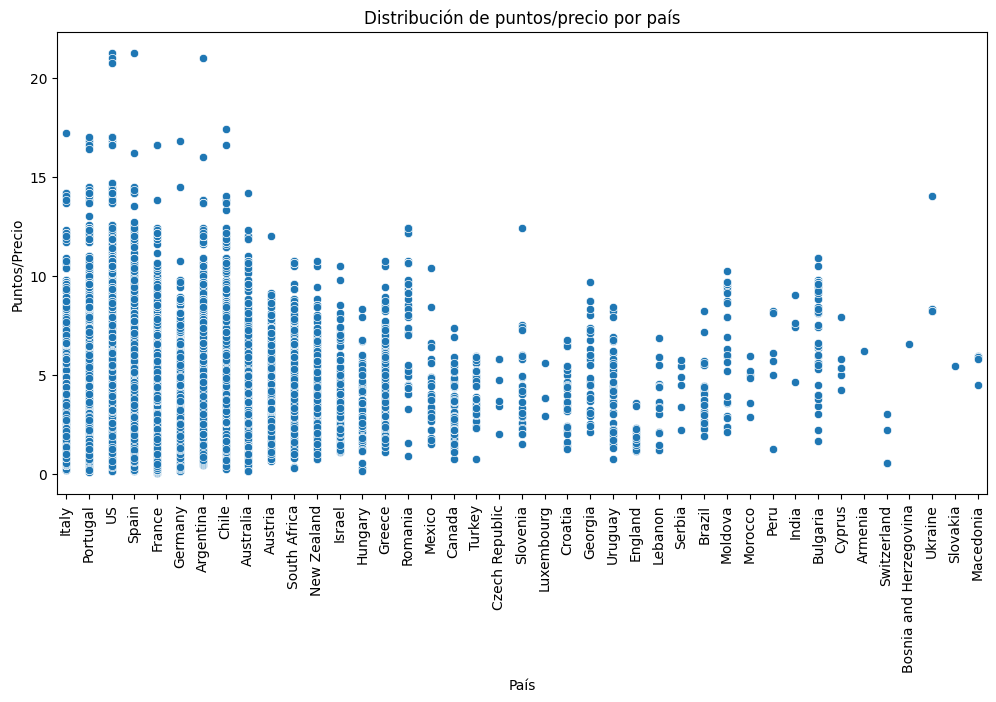

In [22]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la razón puntos/precio
df['points/price'] = df['points'] / df['price']

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='country', y='points/price')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que se corten las etiquetas
plt.margins(x=0.01)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de puntos/precio por país')
plt.xlabel('País')
plt.ylabel('Puntos/Precio')

# Mostrar el gráfico
plt.show()


### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [23]:
nueva_tabla

,country,winery,variety,points,price,points/price
2141,Argentina,Trapiche (Argentina),Cabernet Sauvignon,84,10.0,8.400000
3056,Argentina,Trapiche (Argentina),Cabernet Sauvignon,88,15.0,5.866667
15948,Argentina,Trapiche (Argentina),Cabernet Sauvignon,90,15.0,6.000000
24370,Argentina,Trapiche (Argentina),Cabernet Sauvignon,88,10.0,8.800000
30928,Argentina,Trapiche (Argentina),Cabernet Sauvignon,91,30.0,3.033333
...,...,...,...,...,...,...
235,US,Testarossa (US),Syrah,85,49.0,1.734694
21415,US,Testarossa (US),Syrah,91,54.0,1.685185
37366,US,Testarossa (US),Syrah,94,54.0,1.740741
54756,US,Testarossa (US),Syrah,94,54.0,1.740741


In [24]:
#TU CODIGO
#df3 = #<COMPLETA> # nuevo dataFrame que contiene la unión de las tablas



# Unir las tablas vinosMX y nueva_tabla_sin_desc
df3 = pd.merge(vinosMX, nueva_tabla, on=['country', 'winery', 'variety', 'points', 'price'], how='inner')

# Mostrar la tabla resultante
print(df3)


Empty DataFrame
Columns: [country, winery, variety, description, points, price, points/price]
Index: []


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [25]:
# TU CODIGO
# Filtrar los vinos de México
vinos_Mexico = df[df['country'] == 'Mexico']

# Calcular los valores de points/price
vinos_Mexico['points/price'] = vinos_Mexico.apply(lambda row: row['points'] / row['price'], axis=1)

# Mostrar los resultados
print(vinos_Mexico[['points', 'price', 'points/price']])


       points  price  points/price
378        88   18.0      4.888889
601        87   15.0      5.800000
2692       87   18.0      4.833333
6639       88   27.0      3.259259
7608       83    8.0     10.375000
11591      83   21.0      3.952381
12609      86   39.0      2.205128
15083      84   15.0      5.600000
15101      83   22.0      3.772727
20186      90   56.0      1.607143
23915      82   25.0      3.280000
23933      82   30.0      2.733333
24277      87   19.0      4.578947
25376      87   33.0      2.636364
25888      84   27.0      3.111111
26031      86   13.0      6.615385
26295      87   58.0      1.500000
27211      83   13.0      6.384615
30224      87   49.0      1.775510
34244      88   22.0      4.000000
37963      85   23.0      3.695652
38825      88   20.0      4.400000
41594      88   26.0      3.384615
42368      83   27.0      3.074074
42488      89   31.0      2.870968
43799      92   54.0      1.703704
44099      84   10.0      8.400000
55088      86   22.0

<ipython-input-25-9373926dbf4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_Mexico['points/price'] = vinos_Mexico.apply(lambda row: row['points'] / row['price'], axis=1)


#### &#9758; Observa la relación puntos-precio por país

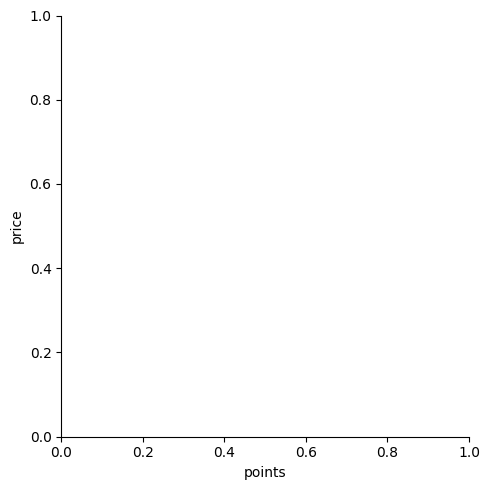

In [26]:
sns.relplot(x="points", y="price", hue="country", kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

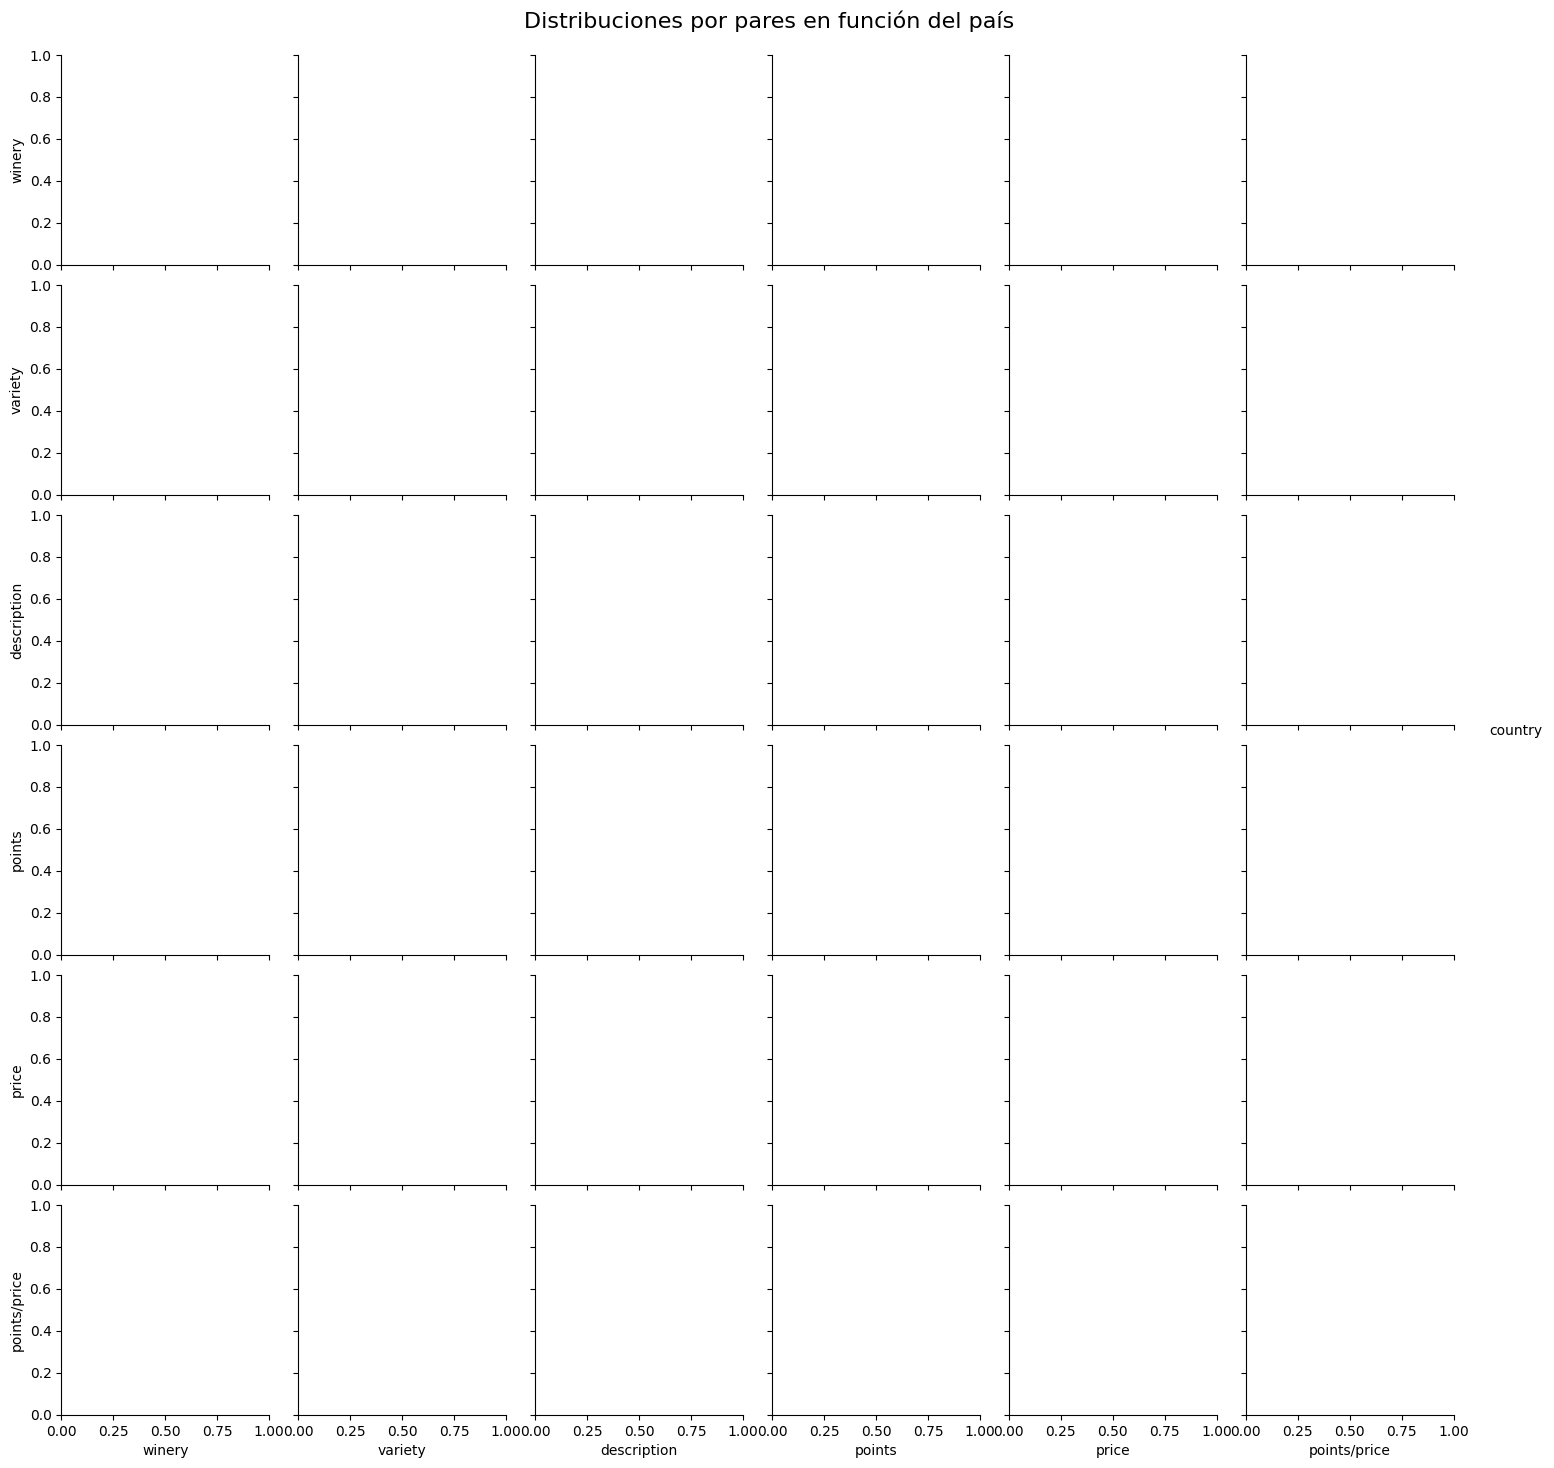

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

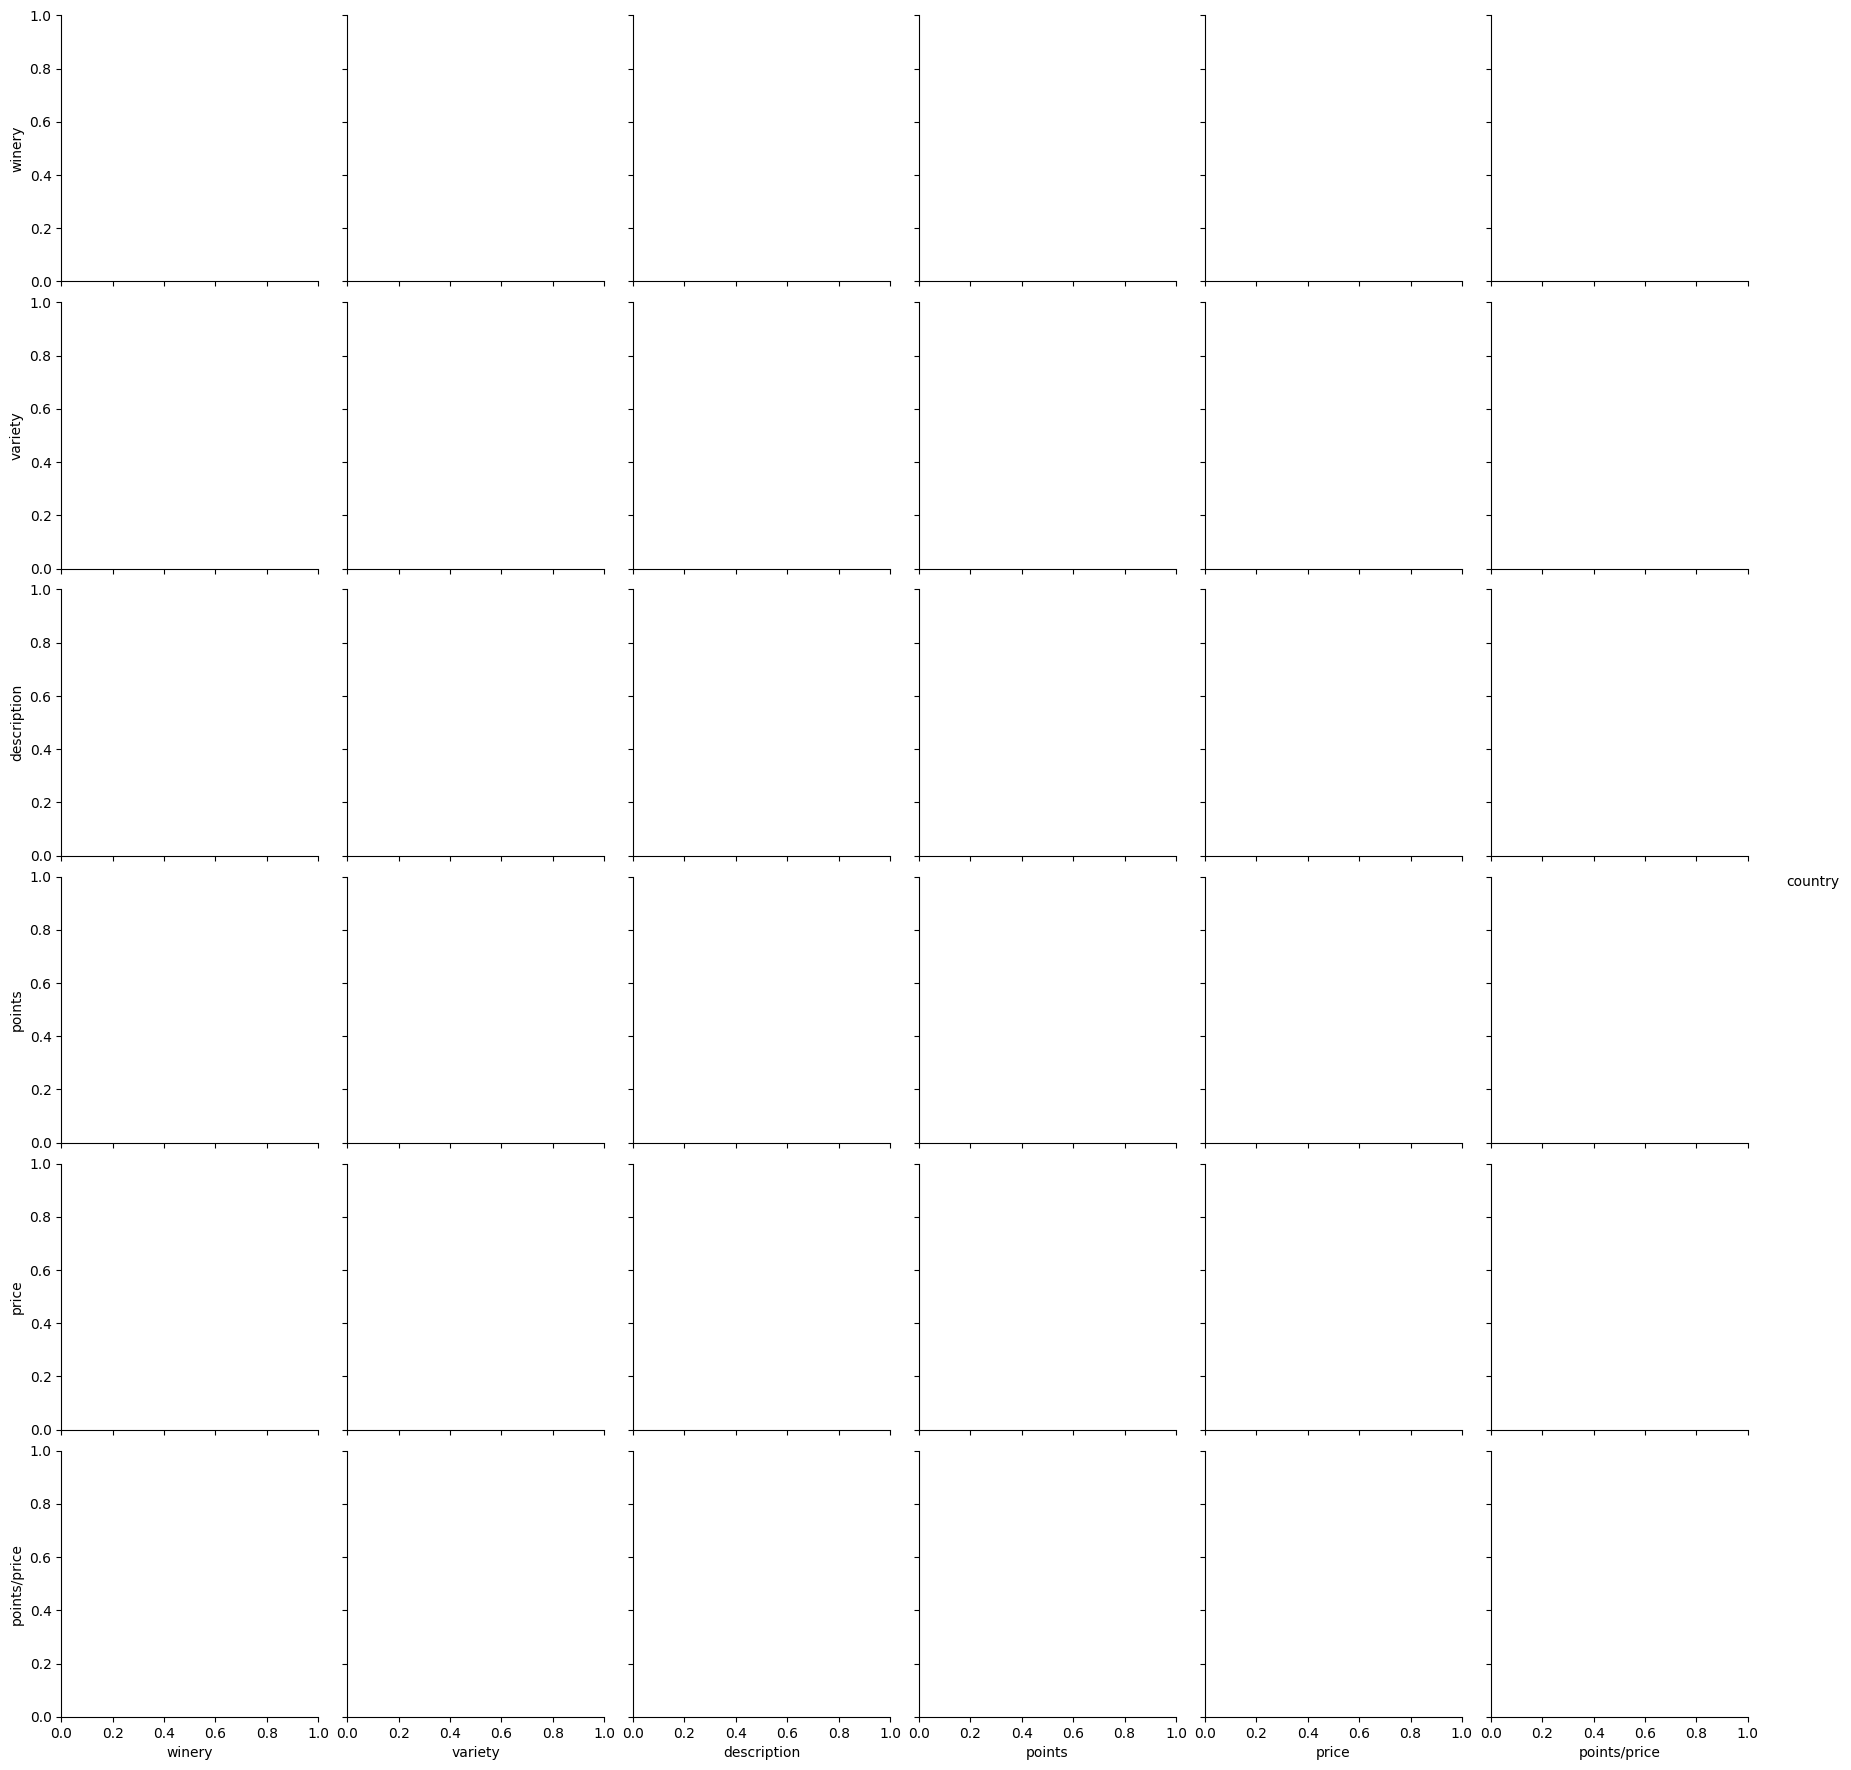

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos de México en df3
mexico_data = df3[df3['country'] == 'Mexico']

# Eliminar los datos de México del DataFrame original df3
df3 = df3[df3['country'] != 'Mexico']

# Concatenar los datos filtrados de México al final de una nueva tabla auxiliar mx_top
mx_top = pd.concat([df3, mexico_data])

# Observar las distribuciones por pares en función del país
sns.pairplot(mx_top, hue='country', diag_kind='kde')

# Ajustar el diseño de los subplots
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribuciones por pares en función del país', fontsize=16)

# Mostrar el pairplot
plt.show()





#mx_top = #<COMPLETA>
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

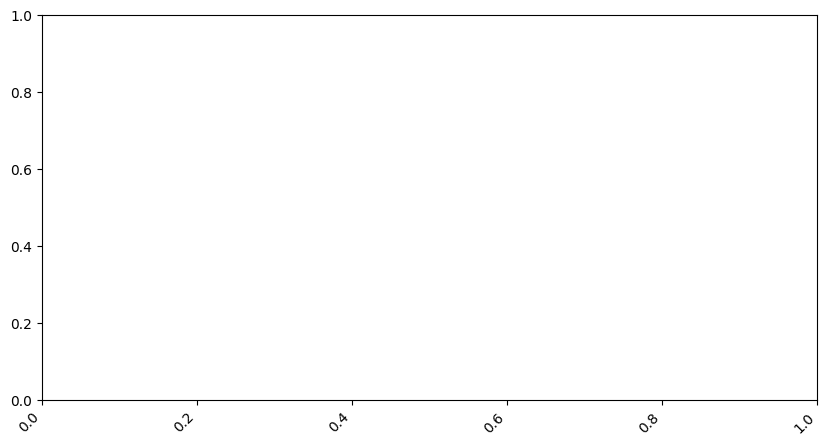

In [28]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

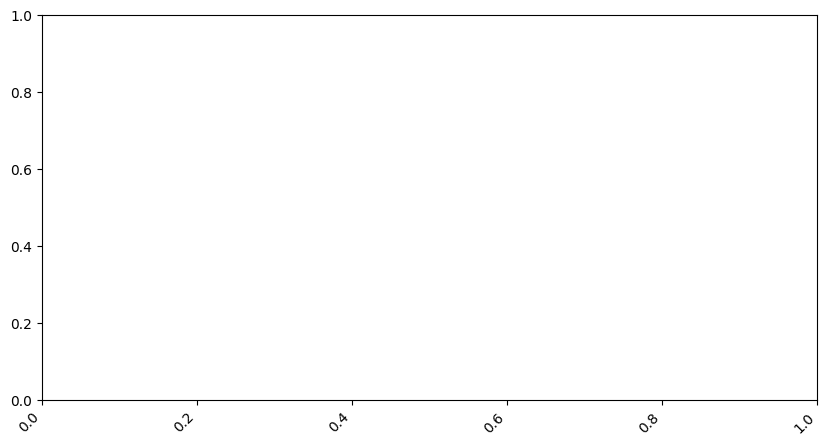

In [29]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


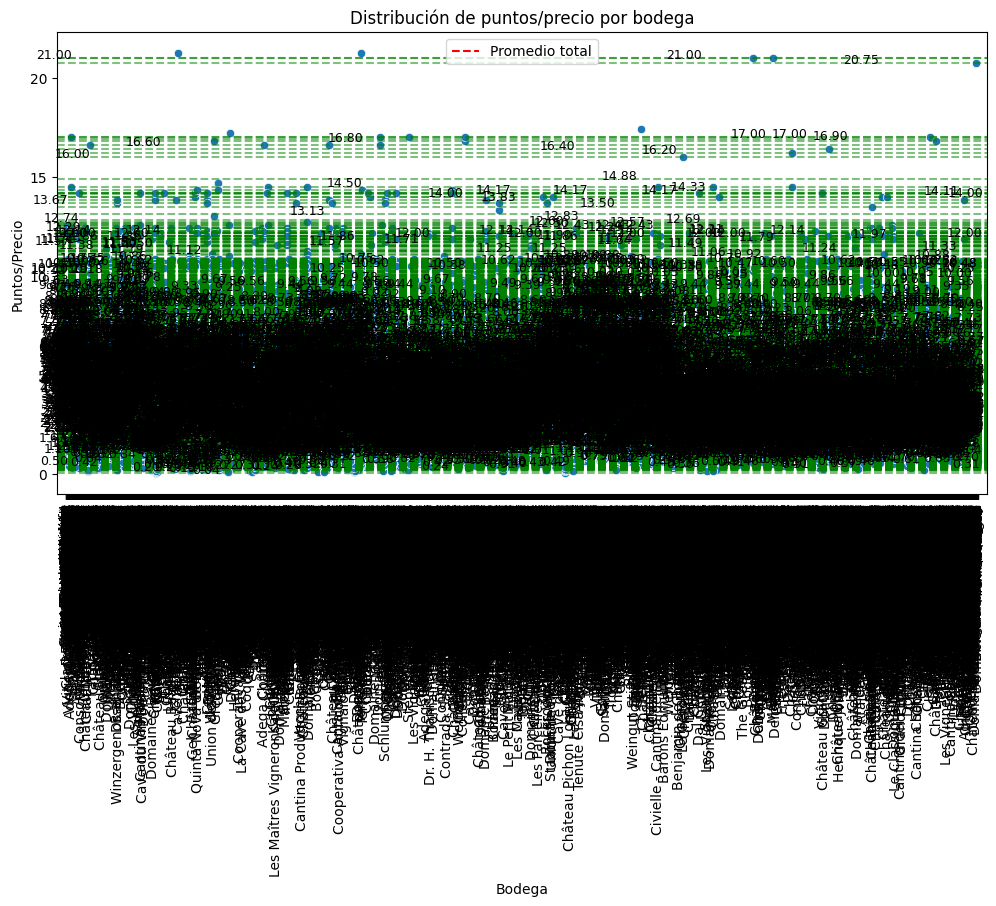

In [30]:
#medias = #<COMPLETA>

# TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los valores promedio de puntos/precio por país y bodega
promedio_por_bodega = df.groupby(['country', 'winery'])['points/price'].mean().reset_index()

# Calcular el promedio de todos los datos de puntos/precio
promedio_total = df['points/price'].mean()

# Crear el gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='winery', y='points/price')

# Dibujar una línea horizontal que marque el promedio de todos los datos
plt.axhline(y=promedio_total, color='r', linestyle='--', label='Promedio total')

# Dibujar marcas ubicando los valores promedio por cada bodega
for idx, row in promedio_por_bodega.iterrows():
    plt.axhline(y=row['points/price'], color='g', linestyle='--', alpha=0.5)
    plt.text(idx, row['points/price'], f"{row['points/price']:.2f}", fontsize=9, ha='right')

# Ajustar los márgenes para evitar que se corten las etiquetas
plt.margins(x=0.01)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de puntos/precio por bodega')
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

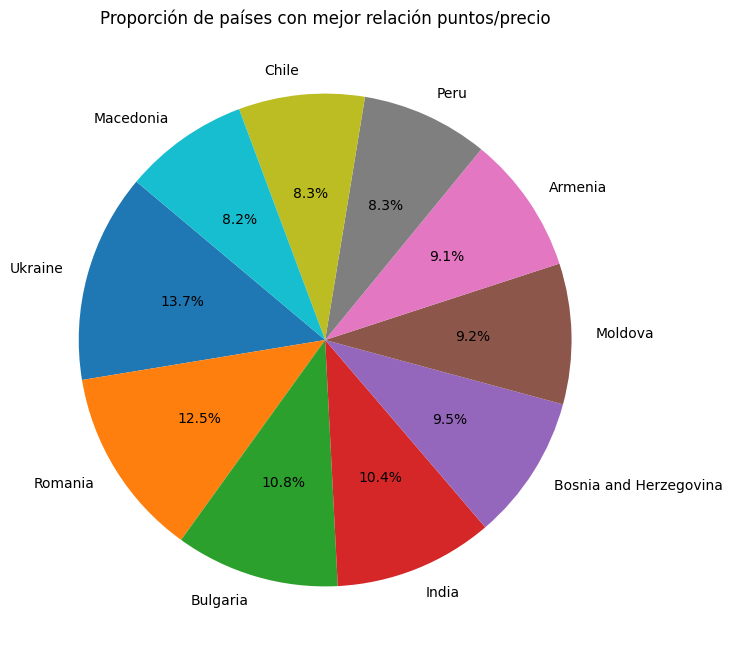

In [31]:
# TU CODIGO
import matplotlib.pyplot as plt

# Calcular la relación puntos/precio promedio por país
promedio_por_pais = df.groupby('country')['points/price'].mean()

# Seleccionar los países con las mejores relaciones puntos/precio (por ejemplo, los 10 primeros)
mejores_paises = promedio_por_pais.nlargest(10)

# Determinar la proporción de cada país en el conjunto seleccionado
proporciones = mejores_paises / mejores_paises.sum()

# Crear un gráfico de pastel para visualizar las proporciones
plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con mejor relación puntos/precio')
plt.show()
